In [6]:
from astropy.io import ascii
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.gridspec import GridSpec
from astropy.table import vstack
from glob import glob
from astropy.table import Table
import pickle
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import colors
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib
import os

def init():
    matplotlib.rcParams['xtick.minor.size'] = 6
    matplotlib.rcParams['xtick.major.size'] = 6
    matplotlib.rcParams['ytick.major.size'] = 6
    matplotlib.rcParams['ytick.minor.size'] = 6
    matplotlib.rcParams['lines.linewidth'] = 1.5
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['font.size']= 16
    matplotlib.rcParams['font.family']= 'sans-serif'
    matplotlib.rcParams['xtick.major.width']= 2.
    matplotlib.rcParams['ytick.major.width']= 2.
    matplotlib.rcParams['ytick.direction']='in'
    matplotlib.rcParams['xtick.direction']='in'

init()
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['text.usetex'] = True

#os.environ['PATH'] = os.environ['PATH'] + '/usr/local/texlive/2021basic/bin/universal-darwin/'

In [2]:
filt = 'r'
with open('output/bns_Bulla_parameter_grid_Andreoni_theta_simulations_%sband.dat'%(filt),'rb') as f:
    r = pickle.load(f)
    
filt = 'J'    
with open('output/bns_Bulla_parameter_grid_Andreoni_theta_simulations_%sband.dat'%(filt),'rb') as f:
    J = pickle.load(f)
    
peakmags = []
for row in r:
    peakmags.append(np.min(row['mag'][0]))
r['peak_mag'] = peakmags

peakmags = []
for row in J:
    peakmags.append(np.min(row['mag'][0]))
J['peak_mag'] = peakmags

Install gpytorch if you want to use it...


In [3]:
filt = 'r'
with open('output/bns_Bulla_parameter_grid_Andreoni_%sband.dat'%(filt),'rb') as f:
    r = pickle.load(f)
    
filt = 'J'    
with open('output/bns_Bulla_parameter_grid_Andreoni_%sband.dat'%(filt),'rb') as f:
    J = pickle.load(f)
    

In [4]:
thetas = np.unique(J['theta'])
phis = np.unique(J['phi'])
mej_dyns = np.unique(J['mej_dyn'])
mej_winds = np.unique(J['mej_wind'])

In [5]:
#tablelist = [g,r,J]
#cols = ['blue','red','orange']
#labs = ['g','r','J']
#cmap = colors.LinearSegmentedColormap.from_list("",['mediumturquoise','cornflowerblue','darkblue'])
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']

fig = plt.figure(figsize=(25,15))
gs = GridSpec(2,2,hspace=0.5,wspace=0.2)
dist = np.array([100,200,300]) #Mpc
DMs = 5*np.log10(dist*1e6/10)
pmarrays = []
axs = []
is_dets = [[],[]]

is_dets = [[],[]]
max_dms = [[],[]]
gs1 = gs[0].subgridspec(1,2,wspace=0.1)

for ind in range(len(tablelist)):
    t = tablelist[ind]
    phi = phis[0]
    t1 = t[(t['theta']>=0) & (t['theta']<60) & (t['phi']==phi)]
    dmarray = []
    for md in mej_dyns:
        t2 = t1[t1['mej_dyn']==md]
        t2.sort('mej_wind')
        t2 = t2.group_by('mej_wind')
        dmbins = []
        for grp in t2.groups:
            dmbins.append(21-np.min(grp['peak_mag']))
        dmarray.append(dmbins)
    #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
    dmarray = np.array(dmarray)
    #ax = fig.add_subplot(gs[ind])
    #is_det = (pmarray<21)
    #is_dets[ind].append(is_det)
    max_dms[ind].append(dmarray)

max_dms = np.array(max_dms)
max_dists = 10*(10**(max_dms/5))/1e6
ax = fig.add_subplot(gs1[0])
im = ax.contour(max_dists[0][0],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=200,vmax=500,cmap=cmap)
plt.title('%s-band'%(labs[0]),size=25)
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
ax.tick_params(size=10)
#cbar = fig.colorbar(im)

ax = fig.add_subplot(gs1[1])
im = ax.contour(max_dists[1][0],levels=[300],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=200,vmax=500,cmap=cmap)
plt.title('%s-band'%(labs[1]),size=25)
ax.set_xticks([0.03,0.06,0.09,0.12])
ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
ax.set_yticks([0.005,0.01,0.015,0.02])
ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
ax.tick_params(size=10)
#cbar = fig.colorbar(im)

<ipython-input-5-6f04e7137335>:45: UserWarning: The following kwargs were not used by contour: 'aspect'
  im = ax.contour(max_dists[0][0],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=200,vmax=500,cmap=cmap)
<ipython-input-5-6f04e7137335>:57: UserWarning: The following kwargs were not used by contour: 'aspect'
  im = ax.contour(max_dists[1][0],levels=[300],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=200,vmax=500,cmap=cmap)


In [8]:
ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE1_isGal0_*')
sched = Table.read(ls[2])

samples = pd.read_csv('/Users/viraj/winter/injection_data/bns_samples_realistic.dat',delimiter='\t')
costhetas = []
distances = []
area90s = []
for row in sched:
    if row['distance'] in distances:
        continue
    costhetas.append(np.abs(np.cos(samples.iloc[int(row['event'])]['theta_jn'])))
    distances.append(row['distance'])
    print(row['distance'],np.abs(np.cos(samples.iloc[int(row['event'])]['theta_jn'])))
    area90s.append(row['area90'])


sinds = np.argsort(distances)
realistic_costhetas = np.array(costhetas)[sinds]
realistic_distances = np.array(distances)[sinds]
area90s = np.array(area90s)[sinds]
with open('realistic_simulations_stats.csv','w') as f:
    f.write('Distance,costheta,area90\n')
    for ind in range(len(realistic_costhetas)):
        f.write('%.3f,%.3f,%.3f\n'%(realistic_distances[ind],realistic_costhetas[ind],area90s[ind]))

162.96513250175389 0.9562548139078755
267.2252769416377 0.8072717934034012
126.84621080953005 0.7144979167509209
205.4005932952305 0.6956734101735448
343.4934256409743 0.8962774955796295
115.76661933630648 0.9975469658022056
216.8265690149866 0.69601330631585
221.29599478720382 0.9908073926574599
417.03606014880205 0.8925209379940858
100.28942703308223 0.32724047936170664
134.19015405873307 0.4569812844256611
264.14160231900587 0.3764506134044096
338.1538562978532 0.8535050297622966
269.08517617009744 0.9901119648493424
148.6795736273486 0.6977991477599004
210.86171809205854 0.9177144854917774


In [11]:
mask = (realistic_distances<400)
realistic_distances = realistic_distances[mask]
realistic_costhetas = realistic_costhetas[mask]
area90s = area90s[mask]
distances, costhetas

([162.96513250175389,
  267.2252769416377,
  126.84621080953005,
  205.4005932952305,
  343.4934256409743,
  115.76661933630648,
  216.8265690149866,
  221.29599478720382,
  417.03606014880205,
  100.28942703308223,
  134.19015405873307,
  264.14160231900587,
  338.1538562978532,
  269.08517617009744,
  148.6795736273486,
  210.86171809205854],
 [0.9562548139078755,
  0.8072717934034012,
  0.7144979167509209,
  0.6956734101735448,
  0.8962774955796295,
  0.9975469658022056,
  0.69601330631585,
  0.9908073926574599,
  0.8925209379940858,
  0.32724047936170664,
  0.4569812844256611,
  0.3764506134044096,
  0.8535050297622966,
  0.9901119648493424,
  0.6977991477599004,
  0.9177144854917774])

Blue r 12 0
Blue GW170817 r 12 10
Blue J 12 0
Blue GW170817 J 12 10


<ipython-input-12-d0f9986d033f>:72: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax.contour(max_dists[0][0],[max_dists[0][0][3][5]],colors=[color_list[-1]],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='--',linewidth=3)
<ipython-input-12-d0f9986d033f>:73: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs1 = ax.contour(max_dists[0][0],levels=dists_to_plot,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='-',alpha=0.6,vmin=150,vmax=500,cmap='magma',linewidth=0.7)
<ipython-input-12-d0f9986d033f>:95: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax.contour(max_dists[1][0],[max_dists[1][0][3][5]],colors=[color_list[-1]],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='--',linewidth=3)
<ipython-input-12-d0f9986d033f>:96: UserWarning: The following kwargs

Red r 3 0
Red J 3 0
Red GW170817 r 3 2
Red GW170817 J 3 2
Blue r 12 2
Blue GW170817 r 12 7
Blue J 12 0
Blue GW170817 J 12 10
Red r 3 1
Red J 3 0
Red GW170817 r 3 2
Red GW170817 J 3 2


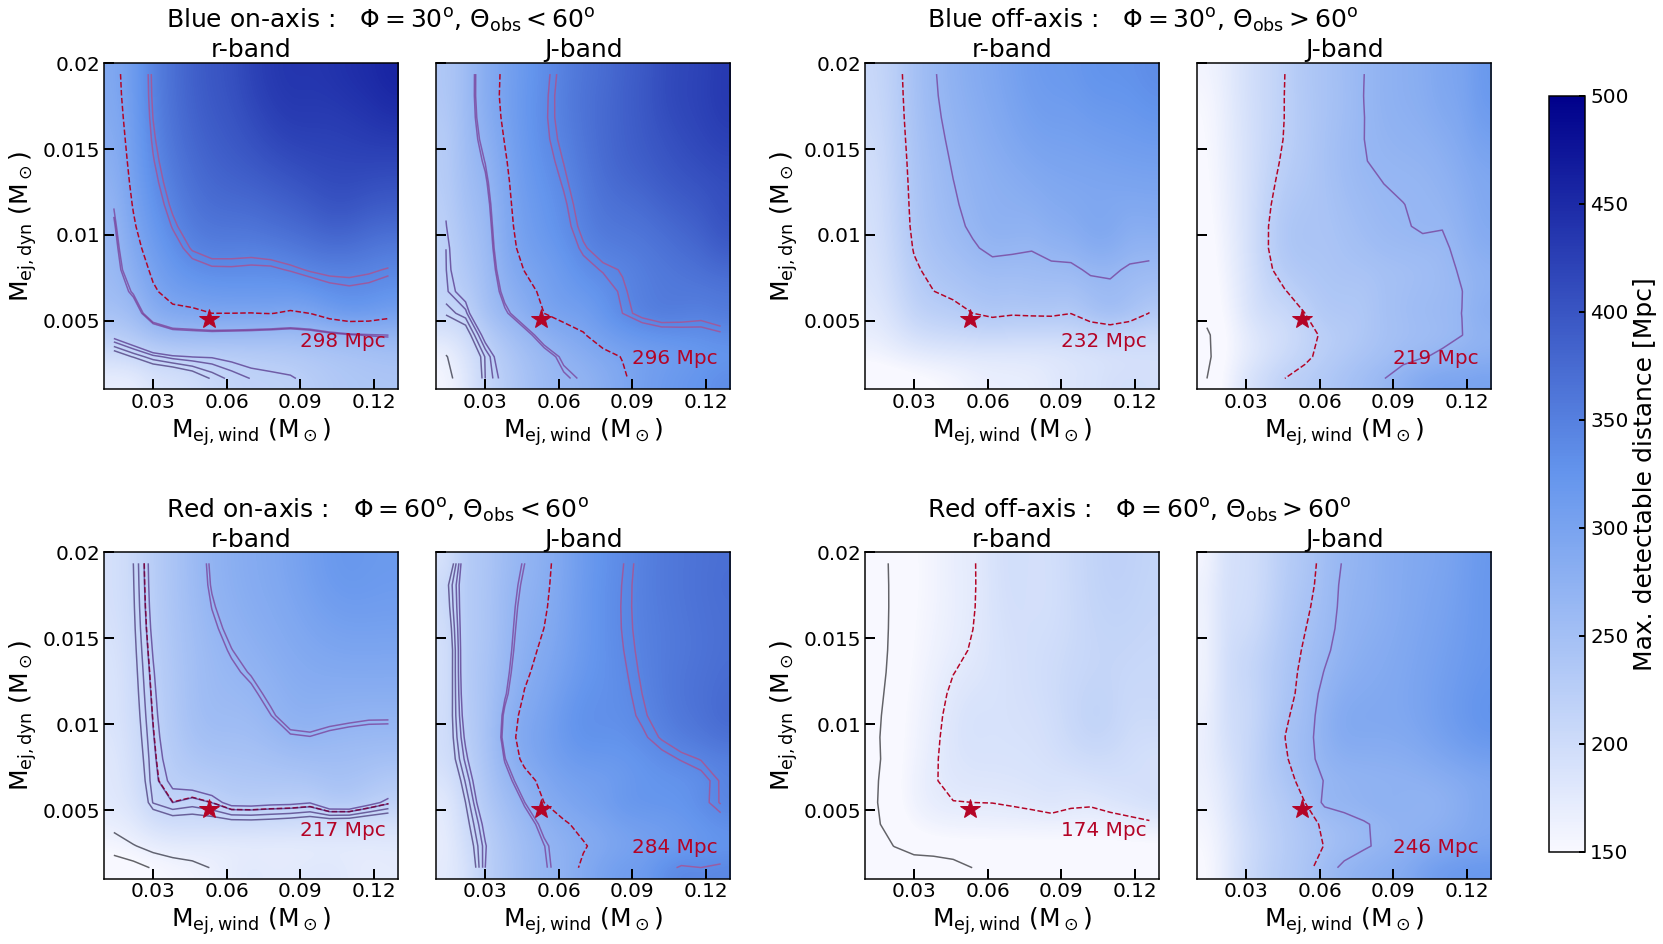

In [12]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
color_list = [plt.get_cmap('coolwarm')(i) for i in np.linspace(0, 1, 10)]
#cmap = colors.LinearSegmentedColormap.from_list("",[color_list[4],color_list[2],color_list[0]])
#cmap = mpl.cm.coolwarm

tablelist = [r,J]
cols = ['red','orange']
labs = ['r','J']

fig = plt.figure(figsize=(25,15))
gs = GridSpec(2,2,hspace=0.5,wspace=0.2)

axs = []
#is_dets = [[],[]]

#is_dets = [[],[]]
gs1 = gs[0].subgridspec(1,2,wspace=0.1)


phi_plots = [phis[0],phis[-1]]

delim_angle = 60
theta_plot_lims = [(0,delim_angle),(delim_angle,90)]

enum = -1
kn_types = [['Blue on-axis','Blue off-axis'],['Red on-axis','Red off-axis']]
for phi_ind,phi_val in enumerate(phi_plots):
    for theta_ind,theta_lim in enumerate(theta_plot_lims):
        enum = enum+1
        pmarrays = []
        
        max_dms = [[],[]]
        gs1 = gs[enum].subgridspec(1,2,wspace=0.1)
        
        for ind in range(len(tablelist)):
            t = tablelist[ind]
            phi = phi_val
            t1 = t[(t['theta']>=theta_lim[0]) & (t['theta']<theta_lim[1]) & (t['phi']==phi)]
            dmarray = []
            for md in mej_dyns:
                t2 = t1[t1['mej_dyn']==md]
                t2.sort('mej_wind')
                t2 = t2.group_by('mej_wind')
                dmbins = []
                for grp in t2.groups:
                    dmbins.append(21-np.median(grp['peak_mag']))
                dmarray.append(dmbins)
            #plt.plot(t1['theta'],t1['peak_mag'],'.',c=cols[ind])
            dmarray = np.array(dmarray)
            #ax = fig.add_subplot(gs[ind])
            #is_det = (pmarray<21)
            #is_dets[ind].append(is_det)
            max_dms[ind].append(dmarray)
        
        max_dms = np.array(max_dms)
        max_dists = 10*(10**(max_dms/5))/1e6
        
        if theta_lim[1]==delim_angle:
            dists_to_plot = realistic_distances[(realistic_costhetas>np.cos(delim_angle*np.pi/180))]
            print('Blue r',len(dists_to_plot),len(dists_to_plot[dists_to_plot>np.max(max_dists[0][0])]))
            print('Blue GW170817 r',len(dists_to_plot),len(dists_to_plot[dists_to_plot<max_dists[0][0][3][5]]))
            print('Blue J',len(dists_to_plot),len(dists_to_plot[dists_to_plot>np.max(max_dists[1][0])]))
            print('Blue GW170817 J',len(dists_to_plot),len(dists_to_plot[dists_to_plot<max_dists[1][0][3][5]]))
        else:
            dists_to_plot = realistic_distances[(realistic_costhetas<np.cos(delim_angle*np.pi/180))]
            print('Red r',len(dists_to_plot),len(dists_to_plot[dists_to_plot>np.max(max_dists[0][0])]))
            print('Red J',len(dists_to_plot),len(dists_to_plot[dists_to_plot>np.max(max_dists[1][0])]))
            print('Red GW170817 r',len(dists_to_plot),len(dists_to_plot[dists_to_plot<max_dists[0][0][3][5]]))
            print('Red GW170817 J',len(dists_to_plot),len(dists_to_plot[dists_to_plot<max_dists[1][0][3][5]]))
        ax = fig.add_subplot(gs1[0])
        im = ax.imshow(max_dists[0][0],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=150,vmax=500,cmap=cmap,interpolation='bicubic')
        cs = ax.contour(max_dists[0][0],[max_dists[0][0][3][5]],colors=[color_list[-1]],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='--',linewidth=3)
        cs1 = ax.contour(max_dists[0][0],levels=dists_to_plot,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='-',alpha=0.6,vmin=150,vmax=500,cmap='magma',linewidth=0.7)
        plt.title('%s-band'%(labs[0]),size=25)
        ax.set_xticks([0.03,0.06,0.09,0.12])
        ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
        ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
        ax.tick_params(size=10)
        #cbar = fig.colorbar(im)
        
        ax.plot(mej_winds[5],mej_dyns[3],'*',c=color_list[-1],markersize=20)
        ax.text(0.09,0.0035,'%i Mpc'%(max_dists[0][0][3][5]),size=20,color=color_list[-1])
        
        #fmt = {}
        #strs = ['%i Mpc'%(max_dists[0][0][3][5])]
        #for l, s in zip(cs.levels, strs):
        #    fmt[l] = s
        #ax.clabel(cs,cs.levels, fmt=fmt,  inline=True,fontsize=20)
        
        ax = fig.add_subplot(gs1[1])
        im = ax.imshow(max_dists[1][0],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',aspect=7,vmin=150,vmax=500,cmap=cmap,interpolation='bicubic')
        cs = ax.contour(max_dists[1][0],[max_dists[1][0][3][5]],colors=[color_list[-1]],extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='--',linewidth=3)
        cs1 = ax.contour(max_dists[1][0],levels=dists_to_plot,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='-',alpha=0.6,vmin=150,vmax=500,cmap='magma',linewidth=0.7)
        plt.title('%s-band'%(labs[1]),size=25)
        #ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_xticks([0.03,0.06,0.09,0.12])
        ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        ax.set_yticks([0.005,0.01,0.015,0.02])
        ax.set_yticklabels([],size=12)
        ax.tick_params(size=10)
        sign = '>'
        if theta_lim[1] == delim_angle:
            sign = '<'
        ax.text(-0.1,0.022,r'%s :   $\Phi = %i^{\rm{o}}$, $\Theta_{\rm{obs}} %s %s^{\rm{o}}$'%(kn_types[phi_ind][theta_ind],phi,sign,delim_angle),size=25)
        
        ax.plot(mej_winds[5],mej_dyns[3],'*',c=color_list[-1],markersize=20)
        ax.text(0.09,0.0025,'%i Mpc'%(max_dists[1][0][3][5]),size=20,color=color_list[-1])
#patch100 = mpatches.Patch(facecolor='#95b6f3',edgecolor='black',label=r'100 Mpc')
#patch200 = mpatches.Patch(facecolor='#4263cc',edgecolor='black',label=r'200 Mpc')
#patch300 = mpatches.Patch(facecolor='#00008b',edgecolor='black',label=r'300 Mpc')
#fig.subplots_adjust(right=0.9,left=0)
cbar_ax = fig.add_axes([0.93,0.15,0.02,0.7])
cbar = fig.colorbar(im,cax=cbar_ax)
cbar.set_label('Max. detectable distance [Mpc]',size=25)
cbar.set_ticks([150,200,250,300,350,400,450,500])
cbar.set_ticklabels([150,200,250,300,350,400,450,500])
cbar.ax.tick_params(labelsize=20,pad=5)
#plt.legend(handles=[patch100,patch200,patch300],bbox_to_anchor=(1.5,1.4),fontsize=20)
#plt.savefig('rJ_comparison_ejecta_masses_Bulla_models.pdf',bbox_inches='tight')

In [26]:
colors[-1]

(0.705673158, 0.01555616, 0.150232812, 1.0)

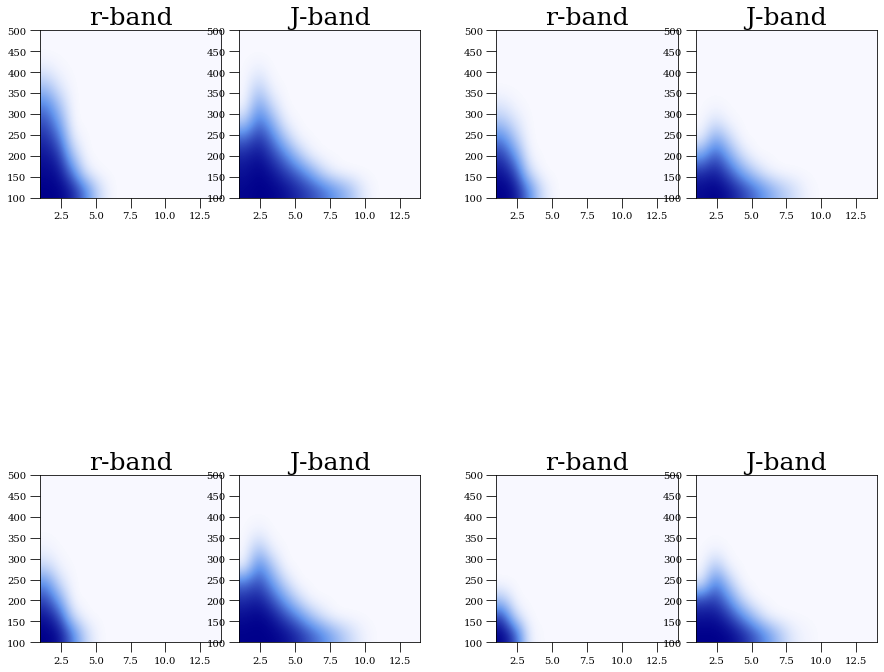

In [11]:
Ds = np.linspace(100,500,10)
DMs = 5*np.log10(Ds*1e5)
t_covs = np.arange(1,15,1)

fig = plt.figure(figsize=(15,15))
gs = GridSpec(2,2)#,hspace=0.5,wspace=0.2)

axs = []
delim_angle = 60
theta_plot_lims = [(0,delim_angle),(delim_angle,90)]
enum =-1
phi_plots = [phis[0],phis[-1]]

for phi_ind,phi_val in enumerate(phi_plots):
    for theta_ind,theta_lim in enumerate(theta_plot_lims):
        enum = enum+1
        pmarrays = []
        
        gs1 = gs[enum].subgridspec(1,2,wspace=0.1)
        
        det_fracs = [[],[]]
        #fdets = [[],[]]
        

        for ind in range(len(tablelist)):
            t = tablelist[ind]
            phi = phi_val
            t1 = t[(t['theta']>=theta_lim[0]) & (t['theta']<theta_lim[1]) & (t['phi']==phi)]


            for DM in DMs:
                fdetarray = []
                for t_cov in t_covs:
                    mapps = t1['mag'][:,0]+DM
                    t_ind = np.argmin(np.abs(t1[0]['t']-t_cov))
                    m_at_cov = mapps[:,t_ind]
                    ndet = np.sum(m_at_cov<21)
                    fdet = ndet/len(m_at_cov)
                    
                    fdetarray.append(fdet)
                det_fracs[ind].append(fdetarray)    
        
        det_fracs = np.array(det_fracs)
        
        ax = fig.add_subplot(gs1[0])
        im = ax.imshow(det_fracs[0],extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',aspect=0.03,vmin=0,vmax=1,cmap=cmap,interpolation='bicubic')
        plt.title('%s-band'%(labs[0]),size=25)
        #ax.set_xticks([0.03,0.06,0.09,0.12])
        #ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        #ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        #ax.set_ylabel(r'M$_{\rm{ej, dyn}}$ (M$_\odot$)',size=25)
        #ax.set_yticks([0.005,0.01,0.015,0.02])
        #ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)
        ax.tick_params(size=10)
        #cbar = fig.colorbar(im)
        
        #ax.plot(mej_winds[5],mej_dyns[3],'*',c='red',markersize=20)
        #ax.text(0.09,0.0035,'%i Mpc'%(max_dists[0][0][3][5]),size=20,color='red')
        
        #fmt = {}
        #strs = ['%i Mpc'%(max_dists[0][0][3][5])]
        #for l, s in zip(cs.levels, strs):
        #    fmt[l] = s
        #ax.clabel(cs,cs.levels, fmt=fmt,  inline=True,fontsize=20)
        
        ax = fig.add_subplot(gs1[1])
        im = ax.imshow(det_fracs[1],extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',aspect=0.03,vmin=0,vmax=1,cmap=cmap,interpolation='bicubic')
        #cs = ax.contour(max_dists[1][0],[max_dists[1][0][3][5]],colors='red',extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='--',linewidth=3)
        #cs1 = ax.contour(max_dists[1][0],levels=dists_to_plot,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='-',alpha=0.6,vmin=150,vmax=500,cmap='magma',linewidth=0.7)
        plt.title('%s-band'%(labs[1]),size=25)
        #ax.set_yticks([0.005,0.01,0.015,0.02])
        #ax.set_xticks([0.03,0.06,0.09,0.12])
        #ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
        #ax.set_xlabel(r'M$_{\rm{ej, wind}}$ (M$_\odot$)',size=25)
        #ax.set_yticks([0.005,0.01,0.015,0.02])
        #ax.set_yticklabels([],size=12)
        ax.tick_params(size=10)
        sign = '>'
        if theta_lim[1] == delim_angle:
            sign = '<'
        #ax.text(-0.1,0.022,r'%s :   $\phi = %i^{\rm{o}}$, $\Theta_{\rm{obs}} %s %s^{\rm{o}}$'%(kn_types[phi_ind][theta_ind],phi,sign,delim_angle),size=25)
        
        #ax.plot(mej_winds[5],mej_dyns[3],'*',c='red',markersize=20)
        #ax.text(0.09,0.0025,'%i Mpc'%(max_dists[1][0][3][5]),size=20,color='red')

In [164]:
sched

col0,event,distance,ra,dec,is_localized,mag_threshold,airmass,pointings_to_detection,hours_to_detection,area90
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,10.0,100.28942703308223,348.17789153309644,42.5066297424796,0.0,--,--,--,--,35.886360314380596
0,6.0,343.4934256409743,129.84030712000435,-42.923045037686094,0.0,--,--,--,--,184.05447360216758
0,8.0,134.19015405873307,27.86841588760251,47.82261884037917,0.0,--,--,--,--,17015.839363011197
0,86.0,126.84621080953005,357.6013757396963,-1.0086737561548882,0.0,--,--,--,--,15851.94890051461
0,22.0,221.29599478720382,43.21801145994791,20.416884093730246,0.0,--,--,--,--,81.18198922937074
0,171.0,269.08517617009744,350.9885293466172,-8.244782864521877,0.0,--,--,--,--,31.97184229726289
0,14.0,148.6795736273486,351.47544620751717,-8.18531225987771,0.0,--,--,--,--,385.0390737038292
0,180.0,162.96513250175389,255.7365652392762,47.61818433302595,1.0,22.90954,1.27441,7.0,45.88270574918818,16.14001021630693
0,60.0,338.1538562978532,299.5173729426362,9.212227417954136,0.0,--,--,--,--,1225.5785454196064


In [7]:
a = ascii.read('/Users/viraj/winter/gwemopt_sims/code/realistic_localisation_areas.csv')
area90s = []
area50s = []
distances = []
for row in a:
    ind = np.argmin(np.abs(row['Area90'] - sched['area90']))
    area90s.append(row['Area90'])
    area50s.append(row['Area50'])
    distances.append(sched[ind]['distance'])
    #print(row['Area90'],sched[ind]['area90'],sched[ind]['distance'])
area90s = np.array(area90s)
area50s = np.array(area50s)
distances = np.array(distances)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/viraj/winter/gwemopt_sims/code/realistic_localisation_areas.csv'

In [30]:
sinds = np.argsort(distances)
distances[sinds], area90s[sinds]

(array([100.28942703, 115.76661934, 126.84621081, 134.19015406,
        148.67957363, 162.9651325 , 205.4005933 , 210.86171809,
        216.82656901, 221.29599479, 264.14160232, 267.22527694,
        269.08517617, 338.1538563 , 343.49342564, 417.03606015]),
 array([3.589000e+01, 6.611000e+01, 1.585195e+04, 1.701584e+04,
        3.850400e+02, 1.614000e+01, 9.814000e+02, 1.173000e+02,
        5.499000e+01, 8.118000e+01, 1.181460e+03, 1.342500e+03,
        3.197000e+01, 1.225580e+03, 1.840500e+02, 1.773800e+02]))

In [8]:
ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE1_isGal0_*')
sched = Table.read(ls[2])
area90s = sched['area90']
distances = sched['distance']

<ipython-input-34-bf73f8f034f1>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  det_fracs = np.array(det_fracs)
<ipython-input-34-bf73f8f034f1>:47: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax.contour(det_fracs[0],[0.1,0.5,0.9],colors='black',extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',linestyles=['--','-',':'],linewidth=3)
<ipython-input-34-bf73f8f034f1>:89: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax.contour(det_fracs[1],[0.1,0.5,0.9],colors='black',extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',linestyles=['--','-',':'],linewidth=3)


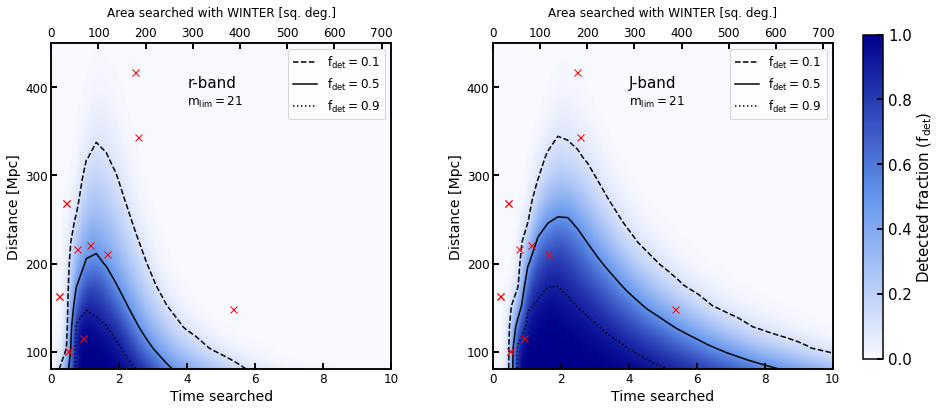

In [34]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
labs = ['r','J']
Ds = np.linspace(20,500,20)
tablelist = [r,J]
DMs = 5*np.log10(Ds*1e5)
t_covs = np.arange(0,15,0.3)

fig = plt.figure(figsize=(14,6))
gs = GridSpec(1,2,hspace=0.4,wspace=0.3)

axs = []
delim_angle = 60
theta_plot_lims = [(0,delim_angle),(delim_angle,90)]
enum =-1
phi_plots = [phis[0],phis[-1]]

enum = enum+1
pmarrays = []
        
#gs1 = gs[enum].subgridspec(1,2,wspace=0.1)
        
det_fracs = [[],[]]
#fdets = [[],[]]
        

for ind in range(len(tablelist)):
    t = tablelist[ind]
    t1 = t


    for DM in DMs:
        fdetarray = []
        for t_cov in t_covs:
            mapps = t1['mag'][:,0]+DM
            t_ind = np.argmin(np.abs(t1[0]['t']-t_cov))
            m_at_cov = mapps[:,t_ind]
            ndet = np.sum(m_at_cov<21)
            fdet = ndet/len(m_at_cov)
                    
            fdetarray.append(fdet)
        det_fracs[ind].append(fdetarray)    
        
    det_fracs = np.array(det_fracs)

ax = fig.add_subplot(gs[0])
im = ax.imshow(det_fracs[0],extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',aspect=0.026,vmin=0,vmax=1,cmap=cmap,interpolation='bicubic')
cs = ax.contour(det_fracs[0],[0.1,0.5,0.9],colors='black',extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',linestyles=['--','-',':'],linewidth=3)
#ax.set_title('%s-band'%(labs[0]),size=15)
ax.set_ylim(80,450)
ax.set_xlim(0,10)
ax.set_yticks([100,200,300,400])
ax.set_xticks([0,2,4,6,8,10])
#ax.set_xticklabels([0.03,0.06,0.09,0.12],size=20)
ax.set_ylabel(r'Distance [Mpc]',size=14)
ax.set_xlabel(r'Time searched',size=14)
#ax.set_yticks([0.005,0.01,0.015,0.02])
#ax.set_yticklabels([0.005,0.01,0.015,0.02],size=20)

ax.text(4,400,'r-band',size=15)
ax.text(4,380,r'm$_{\rm{lim}} = 21$',size=12)
ax2 = ax.twiny()
ax2.set_xlim(np.array([0,10])*9*3600/450 * 1)
ax2.set_xlabel(r'Area searched with WINTER [sq. deg.]',size=12,labelpad=10)

ax.plot(sched['area90']/(9*3600/450),sched['distance'],'x',color='red',markersize=7)
#ax.plot(area50s/(9*3600/(450)),distances,'x',color='red',markersize=7)

ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

ax.plot(0,0, label=r'f$_{\rm{det}} = 0.1$', color='black', ls='--')
ax.plot(0,0, label=r'f$_{\rm{det}} = 0.5$', color='black', ls='-')
ax.plot(0,0, label=r'f$_{\rm{det}} = 0.9$', color='black', ls=':')
ax.legend(fontsize=12)
#ax2.set_xticks(xticks*8*3600/450 * 1)
#cbar = fig.colorbar(im)
        
#ax.plot(mej_winds[5],mej_dyns[3],'*',c='red',markersize=20)
#ax.text(0.09,0.0035,'%i Mpc'%(max_dists[0][0][3][5]),size=20,color='red')
        
#fmt = {}
#strs = ['%i Mpc'%(max_dists[0][0][3][5])]
#for l, s in zip(cs.levels, strs):
#    fmt[l] = s
#ax.clabel(cs,cs.levels, fmt=fmt,  inline=True,fontsize=20)
        
ax = fig.add_subplot(gs[1])
im = ax.imshow(det_fracs[1],extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',aspect=0.026,vmin=0,vmax=1,cmap=cmap,interpolation='bicubic')
cs = ax.contour(det_fracs[1],[0.1,0.5,0.9],colors='black',extent=[t_covs.min(),t_covs.max(),Ds.min(),Ds.max()],origin='lower',linestyles=['--','-',':'],linewidth=3)
#cs1 = ax.contour(max_dists[1][0],levels=dists_to_plot,extent=[mej_winds.min(),mej_winds.max(),mej_dyns.min(),mej_dyns.max()],origin='lower',linestyles='-',alpha=0.6,vmin=150,vmax=500,cmap='magma',linewidth=0.7)
#ax.set_title('%s-band'%(labs[1]),size=15)
ax.set_ylim(80,450)


ax.set_xlim(0,10)
ax.set_yticks([100,200,300,400])
ax.set_xticks([0,2,4,6,8,10])
xticks = np.array([0,2,4,6,8,10])
ax2 = ax.twiny()
ax2.set_xlim(np.array([0,10])*9*3600/(450) * 1)
ax2.set_xlabel(r'Area searched with WINTER [sq. deg.]',size=12,labelpad=10)
#ax2.set_xticks(xticks*8*3600/450 * 1)

ax.plot(area90s/(9*3600/(450)),distances,'x',color='red',markersize=7)
#ax.plot(area50s/(9*3600/(450)),distances,'x',color='red',markersize=7)

ax.set_ylabel(r'Distance [Mpc]',size=14)
ax.set_xlabel(r'Time searched',size=14)


ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax.text(4,400,'J-band',size=15)
ax.text(4,380,r'm$_{\rm{lim}} = 21$',size=12)
#ax.text(7.5,350,'< 21 mag',size=15)

cbar_ax = fig.add_axes([0.93,0.15,0.02,0.75])
cbar = fig.colorbar(im,cax=cbar_ax)
cbar.set_label(r'Detected fraction (f$_{\rm{det}}$)',size=15)
#cbar.set_ticks([150,200,250,300,350,400,450,500])
#cbar.set_ticklabels([150,200,250,300,350,400,450,500])
cbar.ax.tick_params(labelsize=15,pad=5)

ax.plot(0,0, label=r'f$_{\rm{det}} = 0.1$', color='black', ls='--')
ax.plot(0,0, label=r'f$_{\rm{det}} = 0.5$', color='black', ls='-')
ax.plot(0,0, label=r'f$_{\rm{det}} = 0.9$', color='black', ls=':')

ax.legend(fontsize=12,loc=1)

#plt.savefig(r'tloc_dist_comparisons.pdf',bbox_inches='tight')

0.9304888888888889

In [29]:
t_covs[d_ind]

1.5

In [5]:
def gen_det_fracs(mlim,tablelist,DMs,t_covs):
    for ind in range(len(tablelist)):
        t = tablelist[ind]
        t1 = t

        det_fracs = [[],[]]
        for DM in DMs:
            fdetarray = []
            for t_cov in t_covs:
                mapps = t1['mag'][:,0]+DM
                t_ind = np.argmin(np.abs(t1[0]['t']-t_cov))
                m_at_cov = mapps[:,t_ind]
                ndet = np.sum(m_at_cov<mlim)
                fdet = ndet/len(m_at_cov)
                    
                fdetarray.append(fdet)
            det_fracs[ind].append(fdetarray)    
        
        det_fracs = np.array(det_fracs)
    return det_fracs

<ipython-input-5-20e054ff1ff3>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  det_fracs = np.array(det_fracs)
<ipython-input-163-405f54053e1f>:19: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  cs = plt.contour(areas,Ds,det_fracs[1],[0.1],colors='black',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 21 mag')
<ipython-input-163-405f54053e1f>:25: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  cs = plt.contour(areas,Ds,det_fracs[1],[0.1],colors='blue',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 20 mag')
<ipython-input-163-405f54053e1f>:30: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  cs = plt.contour(areas,Ds,det_fracs[1],[0.1],col

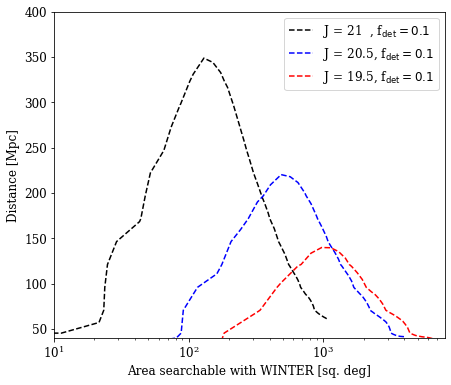

In [163]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
labs = ['r','J']
Ds = np.linspace(20,500,20)
tablelist = [r,J]
DMs = 5*np.log10(Ds*1e5)
t_covs = np.arange(0,15,0.3)

fig = plt.figure(figsize=(7,6))
#gs = GridSpec(1,1,hspace=0.4,wspace=0.3)
        
#ax = fig.add_subplot(gs[0])
mlim = {}
mlim['450'] = 21
texp = 450

areas = 1*t_covs*9*3600/(texp) #sq. deg
det_fracs = gen_det_fracs(21,tablelist,DMs,t_covs)
#ax = fig.add_subplot(gs[0])
cs = plt.contour(areas,Ds,det_fracs[1],[0.1],colors='black',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 21 mag')
#ax.set_ylim(20,450)

texp = 180
areas = 1*t_covs*9*3600/(texp)
det_fracs = gen_det_fracs(20.5,tablelist,DMs,t_covs)
cs = plt.contour(areas,Ds,det_fracs[1],[0.1],colors='blue',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 20 mag')

texp = 40
areas = 1*t_covs*9*3600/(texp)
det_fracs = gen_det_fracs(19.5,tablelist,DMs,t_covs)
cs = plt.contour(areas,Ds,det_fracs[1],[0.1],colors='red',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 19 mag')
plt.xlabel('Area searchable with WINTER [sq. deg]',size=12)
plt.ylabel('Distance [Mpc]',size=12)

plt.xscale('log')
plt.xlim(10)
plt.ylim(40,400)
plt.tick_params(labelsize=12)
#plt.text(1000,350,'J = 21 mag',c='black')
#plt.text(1000,320,'J = 20 mag',c='blue')
#plt.text(1000,290,'J = 19 mag',c='red')
#ax.set_ylim(20,450)
#ax.set_xlim(0,10)
#ax.set_yticks([100,200,300,400])
#ax.set_xticks([0,2,4,6,8,10])
#xticks = np.array([0,2,4,6,8,10])

#ax2 = ax.twiny()
#ax2.set_xlim(np.array([0,10])*9*3600/(450) * 1)
#ax2.set_xlabel(r'Area searched with WINTER [sq. deg.]',size=12)
#ax2.set_xticks(xticks*8*3600/450 * 1)

#ax.plot(sched['area90']/(8*3600/(450)),sched['distance'],'x',color='red',markersize=7)
#ax.set_ylabel(r'Distance [Mpc]',size=12)
#ax.set_xlabel(r'Time allotted for search',size=12)


#ax.tick_params(size=6)
#ax.text(8,370,'J-band',size=15)
#ax.text(7.5,350,'< 21 mag',size=15)

#cbar_ax = fig.add_axes([0.93,0.15,0.02,0.75])
#cbar = fig.colorbar(im,cax=cbar_ax)
#cbar.set_label('Detected fraction',size=15)
#cbar.set_ticks([150,200,250,300,350,400,450,500])
#cbar.set_ticklabels([150,200,250,300,350,400,450,500])
#cbar.ax.tick_params(labelsize=15,pad=5)

plt.plot(0,0, label=r'J = 21  , f$_{\rm{det}} = 0.1$', color='black', ls='--')
#plt.plot(0,0, label=r'J = 21, f$_{\rm{det}} = 0.5$', color='black', ls='-')

plt.plot(0,0, label=r'J = 20.5, f$_{\rm{det}} = 0.1$', color='blue', ls='--')
#plt.plot(0,0, label=r'J = 20.5, f$_{\rm{det}} = 0.5$', color='blue', ls='-')

plt.plot(0,0, label=r'J = 19.5, f$_{\rm{det}} = 0.1$', color='red', ls='--')
#plt.plot(0,0, label=r'J = 19.5, f$_{\rm{det}} = 0.5$', color='red', ls='-')

plt.legend(fontsize=12)
plt.savefig(r'tloc_dist_comparisons_contours_Jband.pdf',bbox_inches='tight')

<ipython-input-5-20e054ff1ff3>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  det_fracs = np.array(det_fracs)
<ipython-input-153-72731908a105>:25: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  cs = plt.contour(t_covs,Ds,det_fracs[1],[0.1],colors='black',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 21 mag')
<ipython-input-153-72731908a105>:39: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  cs = plt.contour(t_covs,Ds,det_fracs[1],[0.1],colors='blue',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 20 mag')
<ipython-input-153-72731908a105>:52: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  cs = plt.contour(t_covs,Ds,det_fracs[1],[0.1],

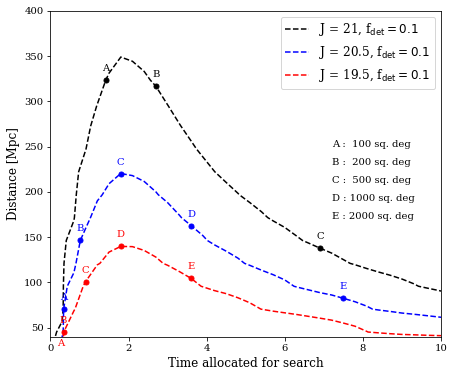

In [153]:
cmap = colors.LinearSegmentedColormap.from_list("",['ghostwhite','cornflowerblue','darkblue'])
labs = ['r','J']
Ds = np.linspace(20,500,20)
tablelist = [r,J]
DMs = 5*np.log10(Ds*1e5)
t_covs = np.arange(0,15,0.3)

fig = plt.figure(figsize=(7,6))
#gs = GridSpec(1,1,hspace=0.4,wspace=0.3)
        
#ax = fig.add_subplot(gs[0])
mlim = {}
mlim['450'] = 21
texp = 450

areas_plot = np.array([100,200,500,1000,2000])
area_labs = ['A','B','C','D','E']
t_plot_21 = areas_plot/(1*9*3600/450)
t_plot_20 = areas_plot/(1*9*3600/120)
t_plot_19 = areas_plot/(1*9*3600/60)

areas = 1*t_covs*9*3600/(texp) #sq. deg
det_fracs = gen_det_fracs(21,tablelist,DMs,t_covs)
#ax = fig.add_subplot(gs[0])
cs = plt.contour(t_covs,Ds,det_fracs[1],[0.1],colors='black',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 21 mag')
#ax.set_ylim(20,450)

X, Y = cs.collections[0].get_paths()[0].vertices.T
for idx,t_plot in enumerate(t_plot_21):
    if t_plot>10 or t_plot < 0:
        continue
    ind = np.argmin(np.abs(X-t_plot))
    plt.plot(X[ind],Y[ind],'.',color='black',markersize=10)
    plt.text(X[ind]-0.1,Y[ind]+10,area_labs[idx],color='black',size=10)
    
texp = 180
areas = 1*t_covs*9*3600/(texp)
det_fracs = gen_det_fracs(20,tablelist,DMs,t_covs)
cs = plt.contour(t_covs,Ds,det_fracs[1],[0.1],colors='blue',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 20 mag')

X, Y = cs.collections[0].get_paths()[0].vertices.T
for idx,t_plot in enumerate(t_plot_20):
    if t_plot>10 or t_plot < 0:
        continue
    ind = np.argmin(np.abs(X-t_plot))
    plt.plot(X[ind],Y[ind],'.',color='blue',markersize=10)
    plt.text(X[ind]-0.1,Y[ind]+10,area_labs[idx],color='blue',size=10)
    
texp = 40
areas = 1*t_covs*9*3600/(texp)
det_fracs = gen_det_fracs(19,tablelist,DMs,t_covs)
cs = plt.contour(t_covs,Ds,det_fracs[1],[0.1],colors='red',origin='lower',linestyles=['--','-'],linewidth=3,label='J = 19 mag')

X, Y = cs.collections[0].get_paths()[0].vertices.T
for idx,t_plot in enumerate(t_plot_19):
    if t_plot>10 or t_plot < 0:
        continue
    ind = np.argmin(np.abs(X-t_plot))
    plt.plot(X[ind],Y[ind],'.',color='red',markersize=10)
    plt.text(X[ind]-0.1,Y[ind]+10,area_labs[idx],color='red',size=10)
    
plt.xlabel('Time allocated for search',size=12)
plt.ylabel('Distance [Mpc]',size=12)



#plt.vlines(t_plot_21,ymin=350,ymax=400,color='black',linestyle='--')
#plt.vlines(t_plot_20,ymin=350,ymax=400,color='blue',linestyle='--')
#plt.vlines(t_plot_19,ymin=350,ymax=400,color='red',linestyle='--')

#plt.xscale('log')
plt.xlim(0,10)
plt.ylim(40,400)
#plt.text(1000,350,'J = 21 mag',c='black')
#plt.text(1000,320,'J = 20 mag',c='blue')
#plt.text(1000,290,'J = 19 mag',c='red')

#ax.set_ylim(20,450)
#ax.set_xlim(0,10)
#ax.set_yticks([100,200,300,400])
#ax.set_xticks([0,2,4,6,8,10])
#xticks = np.array([0,2,4,6,8,10])

#ax2 = ax.twiny()
#ax2.set_xlim(np.array([0,10])*9*3600/(450) * 1)
#ax2.set_xlabel(r'Area searched with WINTER [sq. deg.]',size=12)
#ax2.set_xticks(xticks*8*3600/450 * 1)

#ax.plot(sched['area90']/(8*3600/(450)),sched['distance'],'x',color='red',markersize=7)
#ax.set_ylabel(r'Distance [Mpc]',size=12)
#ax.set_xlabel(r'Time allotted for search',size=12)


#ax.tick_params(size=6)
#ax.text(8,370,'J-band',size=15)
#ax.text(7.5,350,'< 21 mag',size=15)

#cbar_ax = fig.add_axes([0.93,0.15,0.02,0.75])
#cbar = fig.colorbar(im,cax=cbar_ax)
#cbar.set_label('Detected fraction',size=15)
#cbar.set_ticks([150,200,250,300,350,400,450,500])
#cbar.set_ticklabels([150,200,250,300,350,400,450,500])
#cbar.ax.tick_params(labelsize=15,pad=5)

plt.plot(0,0, label=r'J = 21, f$_{\rm{det}} = 0.1$', color='black', ls='--')
#plt.plot(0,0, label=r'J = 21, f$_{\rm{det}} = 0.5$', color='black', ls='-')

plt.plot(0,0, label=r'J = 20.5, f$_{\rm{det}} = 0.1$', color='blue', ls='--')
#plt.plot(0,0, label=r'J = 20.5, f$_{\rm{det}} = 0.5$', color='blue', ls='-')

plt.plot(0,0, label=r'J = 19.5, f$_{\rm{det}} = 0.1$', color='red', ls='--')
#plt.plot(0,0, label=r'J = 19.5, f$_{\rm{det}} = 0.5$', color='red', ls='-')

plt.text(7.2,250,r'A :  100 sq. deg')
plt.text(7.2,230,r'B :  200 sq. deg')
plt.text(7.2,210,r'C :  500 sq. deg')
plt.text(7.2,190,r'D : 1000 sq. deg')
plt.text(7.2,170,r'E : 2000 sq. deg')
plt.legend(fontsize=12)
#plt.savefig(r'tloc_dist_comparisons_contours_Jband_loc_areas.pdf',bbox_inches='tight')

In [4]:
ls = glob('/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE1_isGal0_*')
sched = Table.read(ls[2])
for row in sched:
    print(row['area90']/(8*3600/450), row['distance'])

0.5607243799121968 100.28942703308223
2.8758511500338684 343.4934256409743
265.87249004704995 134.19015405873307
247.68670157054078 126.84621080953005
1.2684685817089179 221.29599478720382
0.49956003589473263 269.08517617009744
6.0162355266223315 148.6795736273486
0.2521876596297958 162.96513250175389
19.14966477218135 338.1538562978532
1.0329295081810284 115.76661933630648
2.771554161407774 417.03606014880205
15.334321101812224 205.4005932952305
20.976603771376354 267.2252769416377
0.859220722114679 216.8265690149866
1.832881263772922 210.86171809205854
18.460362081143664 264.14160231900587


In [6]:
ls[2]

'/Users/viraj/winter/gwemopt_sims/output_parallel/realistic_isPE1_isGal0_isGalTiling0_3days.csv'

In [55]:
mapps = t1['mag'][:,0]+35
m_at_cov = mapps[:,9]
np.sum(m_at_cov<21)

450

In [44]:
m_apps = grp['mag'][:,0]+35
m_apps[:,9]

19.55498300867287
19.47910050471205


In [57]:
len(m_at_cov)

450

In [41]:
t_ind = np.argmin(np.abs(grp[0]['t']-1))
grp[0]['t'][t_ind]

1.0

In [146]:
thetas

0.0
41.40962210927086
60.00000000000001
75.52248781407008
90.0


In [147]:
phis

30.0
37.5
45.0
52.5
60.0


In [8]:
t = Table.read('/Users/viraj/winter/gwemopt_sims/output_parallel/optimistic_isPE0_isGal1_isGalTiling1_14days.csv')
t1 = Table.read('/Users/viraj/winter/gwemopt_sims/output_parallel/optimistic_isPE0_isGal0_isGalTiling0_14days.csv')

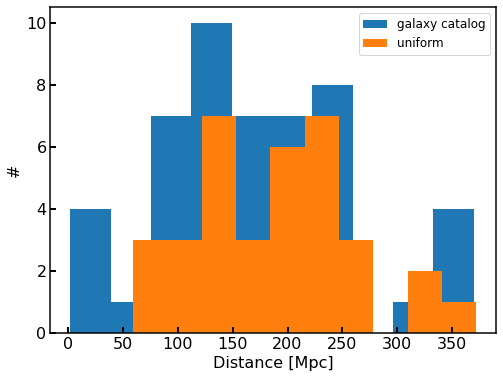

In [17]:
dists = np.unique(t['distance'])
plt.figure(figsize=(8,6))
plt.hist(dists,label='galaxy catalog')
plt.hist(np.unique(t1['distance']),label='uniform')
plt.xlabel('Distance [Mpc]')
plt.ylabel('#')
plt.legend(fontsize=12)

In [20]:
t.sort('event')

In [23]:
80,113,76,105,115

col0,event,distance,ra,dec,is_localized,mag_threshold,airmass,pointings_to_detection,hours_to_detection,area90
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
22,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,23.22057,3.0486,1.0,277.910705679146,9.83547240481836
25,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,22.53271,1.93812,1.0,306.9070256790061,9.83547240481836
21,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,22.58004,1.92796,1.0,259.0087856792294,9.83547240481836
20,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,23.22057,2.97909,1.0,254.02542567904186,9.83547240481836
19,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,22.58004,1.90201,1.0,234.9955856793009,9.83547240481836
18,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,23.22057,3.09202,1.0,230.01222567893882,9.83547240481836
17,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,22.58004,1.91803,1.0,211.1103056791968,9.83547240481836
16,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,23.22057,3.02016,1.0,206.12694567918393,9.83547240481836
15,4.0,115.40260013378649,149.63420833333,-19.35911111111,1.0,22.58004,1.93475,1.0,187.2250256789181,9.83547240481836
